### Goal : To predict weight of a person based on their height 

# Importing Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

6 Major Steps of Machine learning process

  1. Data Collection (Importing Data)
  2. Data Validation
  3. Data Preparation
  4. Modeling
  5. Evaluation
  6. Deployment

# 1. Data Collection (Importing Data)

In [2]:
df = pd.read_csv("../heightweight.csv")

In [3]:
df.head()

,gender,ageYear,ageMonth,HeightIn,WeightLB
0,f,11.91667,143,56.3,85.0
1,f,12.91667,155,62.3,105.0
2,f,12.75000,153,63.3,108.0
3,f,13.41667,161,59.0,92.0
4,f,15.91667,191,62.5,112.5


In [4]:
df.shape # 237 rows/records and 5 columns/variables

(237, 5)

In [5]:
df.columns

Index(['gender', 'ageYear', 'ageMonth', 'HeightIn', 'WeightLB'], dtype='object')

# 2. Data Validation 

### 1. Do we have the right features to predict the outcome in this case the weight of a person?
  Yes, consider the completeness of a dataset i.e quality of the feature vectors/variables over the quantity of dataset.

### 2. Does the data have missing values?

In [6]:
df.isnull().values.any() # None of the columns have any missing values  

False

In [7]:
df.isnull().sum() # Making sure by checking each column

gender      0
ageYear     0
ageMonth    0
HeightIn    0
WeightLB    0
dtype: int64

### 3. Are the data types correctly associated with each feature?

In [8]:
df.info()  # All the data types are correctly detected

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 5 columns):
gender      237 non-null object
ageYear     237 non-null float64
ageMonth    237 non-null int64
HeightIn    237 non-null float64
WeightLB    237 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 8.4+ KB


In [9]:
df.dtypes # Other way to find the data types

gender       object
ageYear     float64
ageMonth      int64
HeightIn    float64
WeightLB    float64
dtype: object

### 4. which 2 summary statistics can never be wrong and you should always ask your client?

In [10]:
df.describe()

,ageYear,ageMonth,HeightIn,WeightLB
count,237.000000,237.000000,237.000000,237.000000
mean,13.702532,164.430380,61.364557,101.308017
std,1.535481,18.425767,3.945402,19.440698
min,11.583330,139.000000,50.500000,50.500000
25%,12.333330,148.000000,58.800000,85.000000
50%,13.583330,163.000000,61.500000,101.000000
75%,14.833330,178.000000,64.300000,112.000000
max,20.833330,250.000000,72.000000,171.500000


__Min__ and __Max__ are the 2 summary statistics which can never go wrong. So the shortest person is 50.50 inches and tallest is 72 inches (Range). 

### 5.1 What is the distribution of feature variable?

(array([  4.,   6.,  22.,  36.,  39.,  58.,  36.,  26.,   7.,   3.]),
 array([ 50.5 ,  52.65,  54.8 ,  56.95,  59.1 ,  61.25,  63.4 ,  65.55,
         67.7 ,  69.85,  72.  ]),
 <a list of 10 Patch objects>)

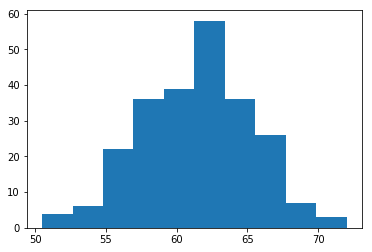

In [11]:
plt.hist(df['HeightIn'])

__Histogram__ : X-axis contain the height values and Y-axis contain the frequency/count of the height. The shape of the histogram is a bell curve, it is statistically normal. 

__Interpretation__: So we have very less count of short people as well as tall people if you observe extreme left and right sides of the plot. Most of the people are in middle with maximum number of people weighing close to 58 inches. 

So we have 4 counts of people ranging from 50.5 to 52.65 and 6 count of people ranging from 52.65 to 54.8 and so on.

### 5.2 What is the distribution of target variable?

(array([  1.,  13.,  51.,  49.,  40.,  60.,  10.,   8.,   3.,   2.]),
 array([  50.5,   62.6,   74.7,   86.8,   98.9,  111. ,  123.1,  135.2,
         147.3,  159.4,  171.5]),
 <a list of 10 Patch objects>)

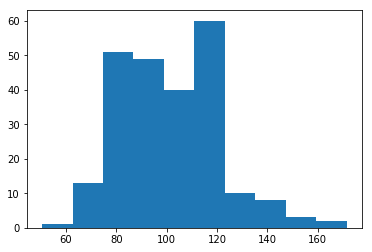

In [12]:
plt.hist(df['WeightLB'])

__Interpretation__: So we have less count of under and over weight people if you observe extreme left and right sides of the plot. its a bimodal distribution with 2 peaks, It looks as if it caters to two different populations. As its a mix of both genders males and females. We know that males grow faster and are mostly heavier than girls. It might effect our model and going forward it would not be efficient for prediction.

So we have only 1 person in the range from 50.5 to 62.6 and 13 count of people ranging from 62.6 to 74.7 and so on.

### 5.3 What is the relationship between feature and target variable?

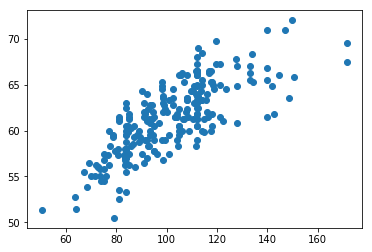

In [13]:
plt.scatter(df['WeightLB'], df['HeightIn'])

The relationship between the two variables in linear and correlated. Upon carefully observing we can see a pattern where some people have contant weight but height is growing. One reason for this would be a strict diet to maintain especially in a sport like wresting where you have to constantly maintain your weight and grow taller. 

#  3. Data Preparation (Cleaning)

This step is applicable only when data is messy. As the data looks fine which we conclude from the step 2 _data validation_.  

# 4. Modeling

In [14]:
Mod = stats.linregress(df['WeightLB'], df['HeightIn'])
Mod

LinregressResult(slope=0.15725760723145538, intercept=45.433100634484191, rvalue=0.77487610662760165, pvalue=1.0286858314030966e-48, stderr=0.008368358548520775)

__rvalue__: Percentage of variation explained by weight, basically explaining how good the fit is.

__pvalue__: Not getting to see the values of slope and intercept look same again if we perform the model __n__ number of times.

__Stderr__: On an average how far it will be off from the actual (Predicted value - actual value)

In [15]:
def predict(weight):
    return Mod.slope*weight + Mod.intercept

# 5. Evaluation

In [16]:
predict(110) # if we had a person with weight 110 Lb then his/her height would be ~62.7 inches

62.731437429944279

In [17]:
predict(400)/12 # 9.02

9.0280119605888611

If we had a person with 400 lb's then their height would be close to 9.02 which is not realistic so the model is trying compensate based on set of data points it was given.

# 6. Deployment

Its about giving the user with set of limitations while actually implementing the model into a real life application/service. 

__Example__: Predicting the count of cars in a parking lot based on the time by 1st implementing the machine learning steps and later embedding the logic/model function obtained into a website for user to play around is called deployment.